# Analizys of aquired results

## Data Analisys
Here you can find all steps of data analisys.

In [2]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import seaborn as sns
from utils.utils import plot_graph, get_data

plt.style.use("seaborn-v0_8")

Firts of all load aquired results

In [3]:
dp_results = pd.read_csv('./results/results_dp.csv')
aco_results = pd.read_csv('./results/results_aco.csv')
ga_results = pd.read_csv('./results/results_ga.csv')

Now we can preview our data

In [4]:
dp_results.head(5)

,Graph Size,Execution Time (s),Iterations,Memory (bytes),Shortest Path,Path Length (m)
0,3,1.130,5,480,0 -> 1 -> 2 -> 0,1153.74
1,4,1.120,16,960,0 -> 1 -> 2 -> 3 -> 0,1218.56
2,5,1.119,53,3496,0 -> 1 -> 2 -> 3 -> 4 -> 0,1289.25
3,6,1.151,166,6728,0 -> 4 -> 3 -> 2 -> 1 -> 5 -> 0,1466.98
4,7,1.127,487,27400,0 -> 1 -> 2 -> 3 -> 4 -> 6 -> 5 -> 0,1499.68


In [5]:
aco_results.head(5)

,Graph Size,Execution Time (s),Iterations,Memory (bytes),Shortest Path,Path Length (m)
0,3,3.420,1000,490.636719,0 -> 2 -> 1 -> 0,1153.74
1,4,3.848,1000,633.632812,0 -> 3 -> 2 -> 1 -> 0,1218.56
2,5,4.238,1000,774.273438,0 -> 4 -> 3 -> 2 -> 1 -> 0,1289.25
3,6,4.678,1000,915.164062,0 -> 5 -> 1 -> 2 -> 3 -> 4 -> 0,1466.98
4,7,5.266,1000,1052.628906,0 -> 5 -> 6 -> 4 -> 3 -> 2 -> 1 -> 0,1499.68


In [6]:
ga_results.head(5)

,Graph Size,Execution Time (s),Iterations,Memory (bytes),Shortest Path,Path Length (m)
0,3,7.861,1000,23566,0 -> 1 -> 2 -> 0,1153.74
1,4,8.284,1000,25326,0 -> 1 -> 2 -> 3 -> 0,1218.56
2,5,9.030,1000,26558,0 -> 4 -> 3 -> 2 -> 1 -> 0,1289.25
3,6,10.025,1000,28326,0 -> 4 -> 3 -> 2 -> 1 -> 5 -> 0,1466.98
4,7,9.477,1000,29774,0 -> 1 -> 2 -> 3 -> 4 -> 6 -> 5 -> 0,1499.68


In [7]:
def get_error(df):
    merged = df.merge(
    dp_results[['Graph Size', 'Path Length (m)']],
    on='Graph Size',
    how='left',
    suffixes=('', '_dp')
    )

    merged['error'] = np.where(
        merged['Path Length (m)_dp'].notna(),
        (merged['Path Length (m)'] - merged['Path Length (m)_dp']).round(2),
        '-'
    )

    df['Error'] = merged['error']

    print(df[['Graph Size', 'Iterations', 'Execution Time (s)', 'Memory (bytes)', 'Error']])

In [8]:
print("DP")
get_error(dp_results)
print("ACO")
get_error(aco_results)
print("GA")
get_error(ga_results)

DP
    Graph Size  Iterations  Execution Time (s)  Memory (bytes) Error
0            3           5               1.130             480   0.0
1            4          16               1.120             960   0.0
2            5          53               1.119            3496   0.0
3            6         166               1.151            6728   0.0
4            7         487               1.127           27400   0.0
5            8        1352               1.112           60304   0.0
6            9        3593               1.139          159496   0.0
7           10        9226               1.153          376480   0.0
8           11       23051               1.231          839264   0.0
9           12       56332               1.417         2670472   0.0
10          13      135181               1.882         5632104   0.0
11          14      319502               2.945        11422152   0.0
12          15      745487               5.530        23301264   0.0
13          16     1720336     

## Dynamic Programming

First of all lets analyse results of DP. Since DP exeded time limit, we have results only up to graph with 22 nodes maximum. However, with use of polynomial regression we can predict metrics values up to graph with 36 nodes

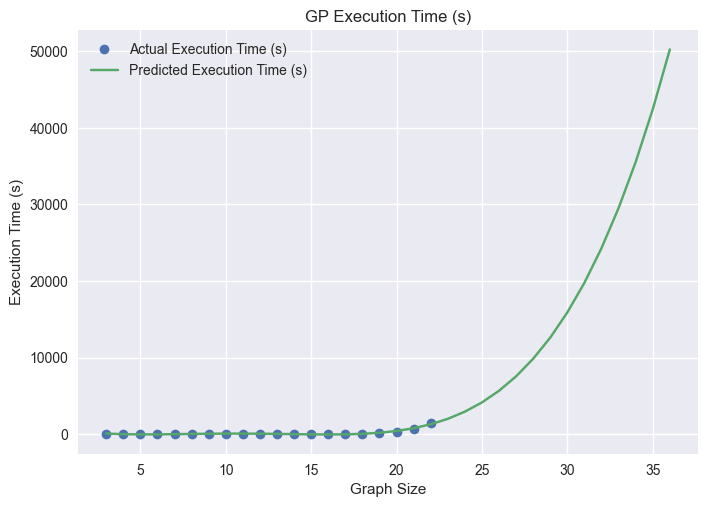

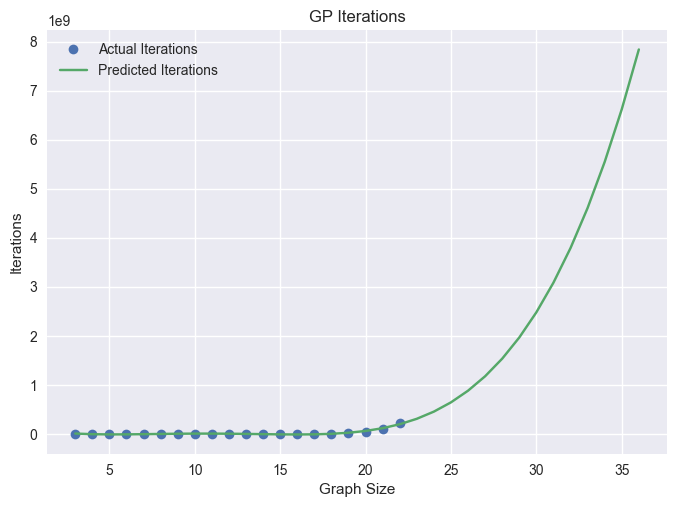

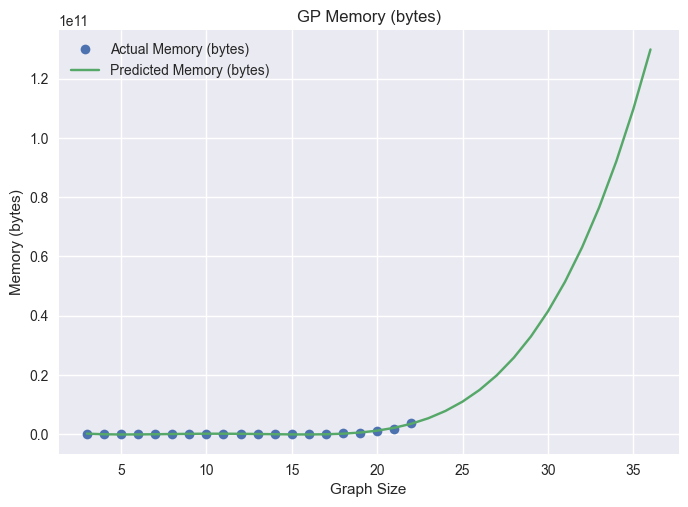

Predicted metrics for 36 node graph
Execution Time:	13.96 h
Iterations	7839174022
Used memory:	120.95 GB
Predicted Iteration
[ 9.43213654e+06 -3.71890778e+06 -8.30022611e+06 -7.36297235e+06
 -3.46010866e+06  1.35359457e+06  5.52155872e+06  7.98539690e+06
  8.18491401e+06  6.05810669e+06  2.04116333e+06 -2.93153590e+06
 -7.42741909e+06 -9.51572256e+06 -6.76749089e+06  3.74442312e+06
  2.54453584e+07  6.22588457e+07  1.18606607e+08  1.99408558e+08
  3.10082803e+08  4.56545640e+08  6.45211560e+08  8.82993242e+08
  1.17730156e+09  1.53604558e+09  1.96763256e+09  2.48096794e+09
  3.08545537e+09  3.79099668e+09  4.60799188e+09  5.54733921e+09
  6.62043505e+09  7.83917402e+09]
Predicted Time
[ 6.17487698e+01 -2.27727890e+01 -5.22246793e+01 -4.62077192e+01
 -2.11248766e+01  9.81873053e+00  3.66158344e+01  5.24570170e+01
  5.37307107e+01  4.00231975e+01  1.41186098e+01 -1.80010701e+01
 -4.71560101e+01 -6.09685276e+01 -4.38630904e+01  2.29336839e+01
  1.61393028e+02  3.96684024e+02  7.57173605e+

In [9]:
x = dp_results['Graph Size'].values.reshape(-1, 1)
x_pred = np.arange(3, 37).reshape(-1, 1)

def plot_and_predict(y_column, degree=2):
    y = dp_results[y_column].values
    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(x)
    model = LinearRegression().fit(X_poly, y)

    X_pred_poly = poly.transform(x_pred)
    y_pred = model.predict(X_pred_poly)

    plt.plot(dp_results['Graph Size'], y, 'o', label=f'Actual {y_column}')
    plt.plot(x_pred.flatten(), y_pred, '-', label=f'Predicted {y_column}')
    plt.xlabel('Graph Size')
    plt.ylabel(y_column)
    plt.title(f'GP {y_column}')
    plt.legend()
    plt.grid(True)
    plt.show()

    return y_pred

pred_time = plot_and_predict('Execution Time (s)', degree=4)
pred_iters = plot_and_predict('Iterations', degree=4)
pred_mem = plot_and_predict('Memory (bytes)', degree=4)

print("Predicted metrics for 36 node graph")
print(f'Execution Time:\t{pred_time[-1] / 3600:.2f} h')
print(f'Iterations\t{int(pred_iters[-1])}')
print(f'Used memory:\t{pred_mem[-1] / (1024**3):.2f} GB')

print("Predicted Iteration")
print(pred_iters)
print("Predicted Time")
print(pred_time)
print("Predicted Memory")
print(pred_mem)

We can see that with increasing size of graph complexity groth exponentially, due to DP algorithm complexity

## ACO and GA

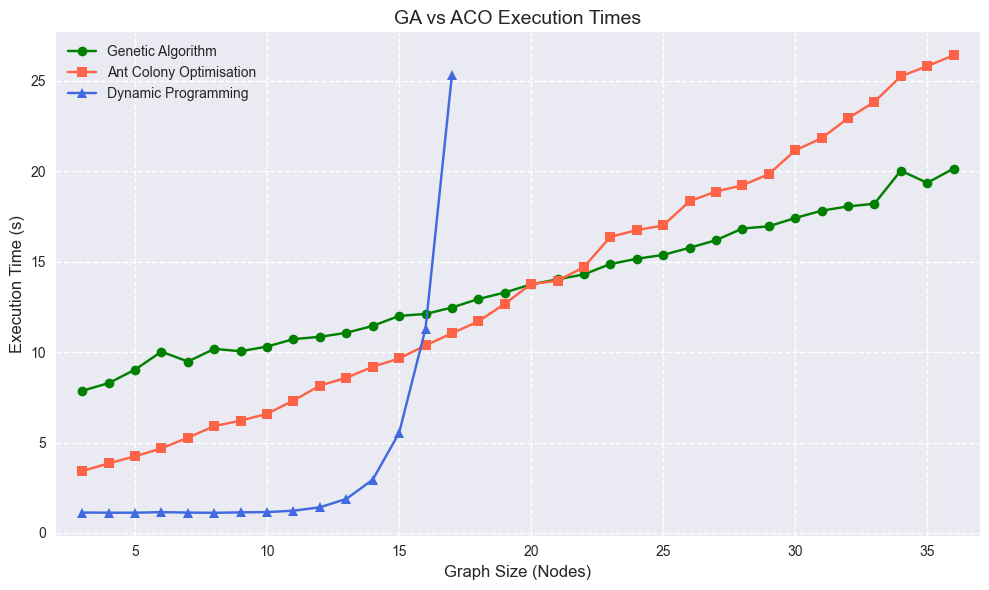

In [10]:
plt.figure(figsize=(10, 6))

plt.plot(ga_results['Graph Size'], ga_results['Execution Time (s)'], marker='o', label="Genetic Algorithm", color='green')
plt.plot(aco_results['Graph Size'], aco_results['Execution Time (s)'], marker='s', label="Ant Colony Optimisation", color='tomato')
plt.plot(dp_results['Graph Size'][:15], dp_results['Execution Time (s)'][:15], marker='^', label="Dynamic Programming", color='royalblue')


plt.title("GA vs ACO Execution Times", fontsize=14)
plt.xlabel("Graph Size (Nodes)", fontsize=12)
plt.ylabel("Execution Time (s)", fontsize=12)

plt.xlim(2, 37)
plt.grid(True, linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()

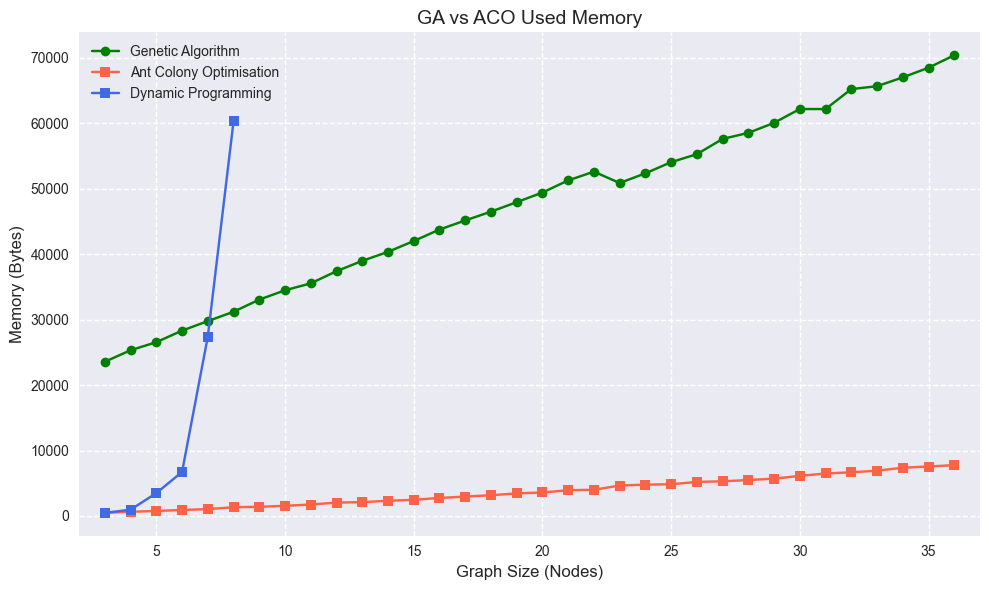

In [11]:
plt.figure(figsize=(10, 6))

plt.plot(ga_results['Graph Size'], ga_results['Memory (bytes)'], marker='o', label="Genetic Algorithm", color='green')
plt.plot(aco_results['Graph Size'], aco_results['Memory (bytes)'], marker='s', label="Ant Colony Optimisation", color='tomato')
plt.plot(dp_results['Graph Size'][:6], dp_results['Memory (bytes)'][:6], marker='s', label="Dynamic Programming", color='royalblue')

plt.title("GA vs ACO Used Memory", fontsize=14)
plt.xlabel("Graph Size (Nodes)", fontsize=12)
plt.ylabel("Memory (Bytes)", fontsize=12)

plt.xlim(2, 37)
plt.grid(True, linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()

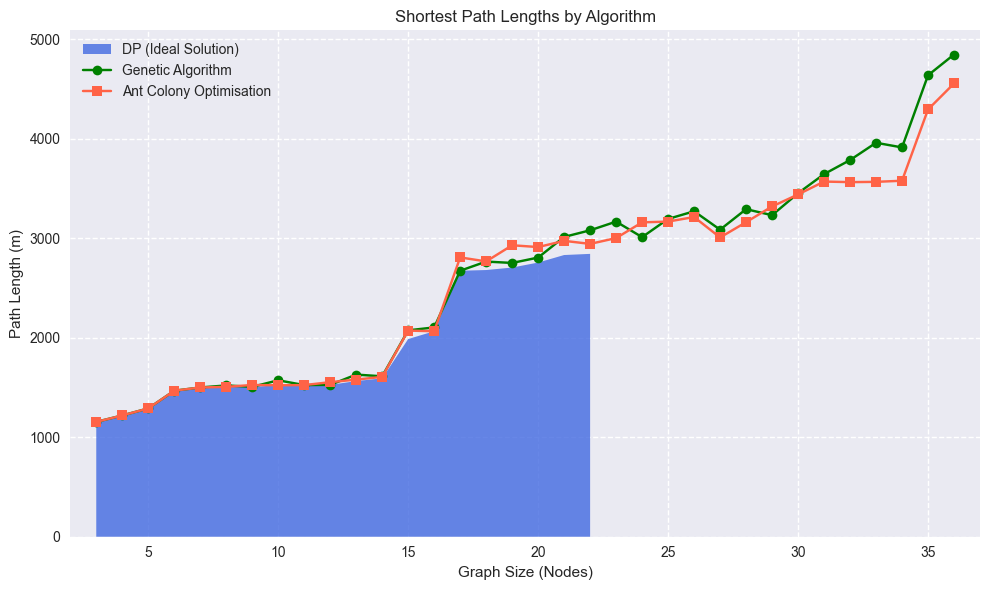

In [12]:
plt.figure(figsize=(10, 6))

plt.stackplot(dp_results['Graph Size'], dp_results['Path Length (m)'], labels=['DP (Ideal Solution)'], colors=['royalblue'], alpha=0.8)

plt.plot(ga_results['Graph Size'], ga_results['Path Length (m)'], marker='o', label="Genetic Algorithm", color='green')
plt.plot(aco_results['Graph Size'], aco_results['Path Length (m)'], marker='s', label="Ant Colony Optimisation", color='tomato')

plt.xlim(2, 37)
plt.title("Shortest Path Lengths by Algorithm")
plt.xlabel("Graph Size (Nodes)")
plt.ylabel("Path Length (m)")
plt.legend(loc='upper left')
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()

## Conclusion

Ant Colony Optimization (ACO) — Effective for Large Datasets

As the dataset size increases, the performance of DP diminishes due to exponential growth in computational requirements. In such cases, ACO becomes more suitable. Its heuristic approach allows for efficient exploration of larger solution spaces. Analizys have shown that ACO maintains reasonable execution times for large-sized TSP instances, making it a viable choice when DP becomes impractical

Genetic Algorithm (GA) - Effective for Medium Datasets

Genetic Algorithm (GA) is particularly effective for medium-sized datasets. It balances exploration and exploitation through its evolutionary approach, providing good solutions within reasonable execution times. While not as fast as ACO for larger datasets, GA demonstrates consistent performance and scalability for medium-sized TSP instances.



In [13]:
nodes = get_data('./data/nodes.json')

paths_ga = [[int(i) for i in ga_results['Shortest Path'][33].split(' -> ')]] 
paths_aco = [[int(i) for i in aco_results['Shortest Path'][33].split(' -> ')]] 


plot_graph(nodes, paths_ga)
plot_graph(nodes, paths_aco)